## Curvas PR

In [2]:
# Librerias
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, neural_network
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Datos
np.random.seed(4)

X, y = datasets.load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Scaling data
scaler = StandardScaler() 
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ivan/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


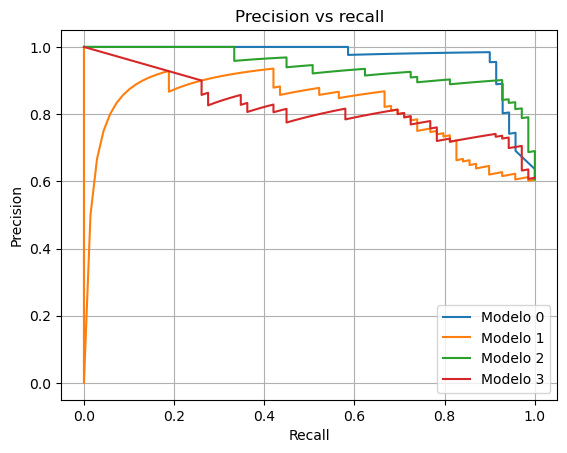

In [7]:
skf = StratifiedKFold(n_splits=4)

logThr = []
logP   = []
logR   = []


i = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    modelo = neural_network.MLPClassifier(
        hidden_layer_sizes=(3),
        activation='relu',
        learning_rate_init=0.001,
        max_iter=20,
        solver='sgd'
        )
    
    prob = modelo.fit(X_train_fold, y_train_fold).predict_proba(X_test_fold)
    
    # Calcular Precision y recall
    precision, recall, thresholds = precision_recall_curve(y_test_fold, prob[:, 1])
    
    plt.plot(recall, precision,label='Modelo %d' % (i))
    
    logThr.append(thresholds)
    logP.append(precision)
    logR.append(recall)
    
    i+=1

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.title('Precision vs recall')
plt.legend(loc="lower right")
plt.show()

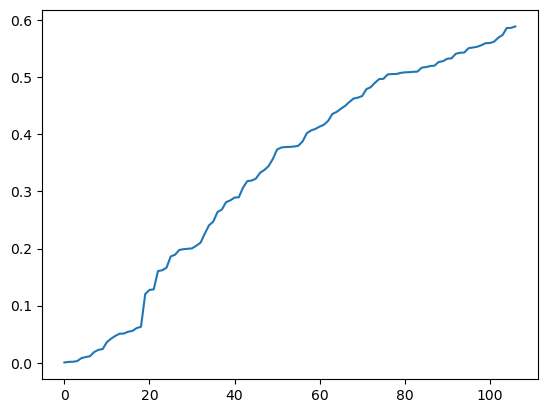

In [5]:
plt.plot(thresholds)

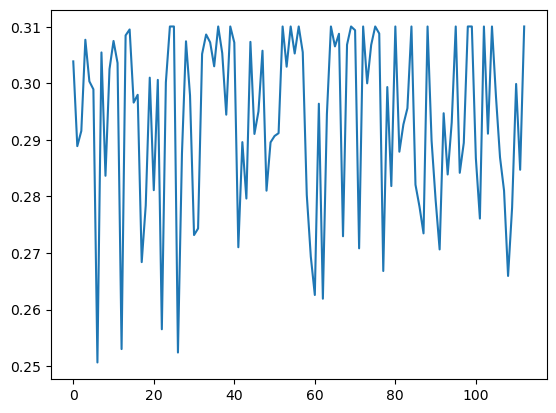

In [9]:
plt.plot(prob[:,1])

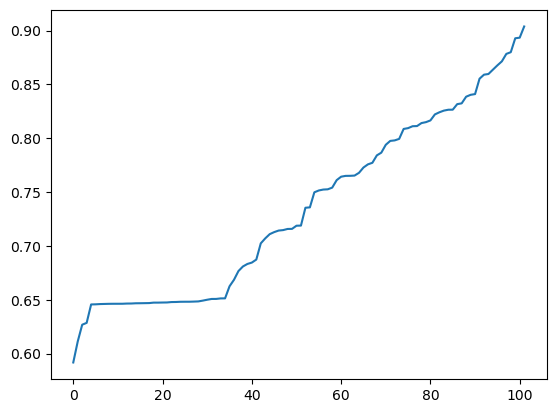

In [10]:
plt.plot(logThr[0])

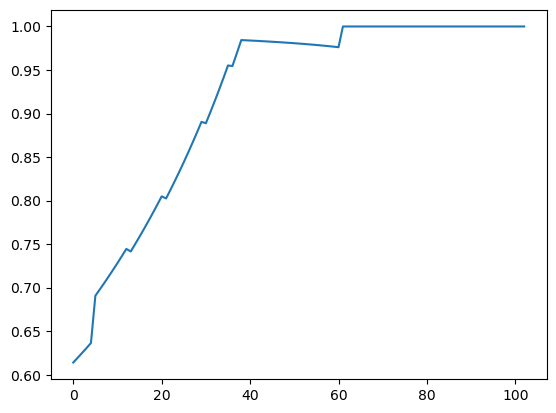

In [11]:
plt.plot(logP[0])

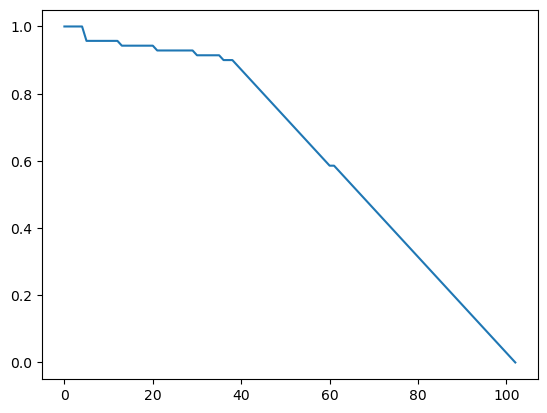

In [12]:
plt.plot(logR[0])